DATA UNDERSTANDING & DATA CLEANING

In [58]:
# Import library
import pandas as pd

# Load dataset
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
print(df.head())
print(df.info())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [59]:
missing_values = df.isnull().sum()

# Menampilkan hasil
print("Jumlah missing values untuk setiap kolom:")
print(missing_values)

Jumlah missing values untuk setiap kolom:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [60]:
# Memisahkan fitur dan label
features = df.drop('Churn', axis=1)  # Mengambil semua kolom kecuali kolom 'Churn' sebagai fitur
label = df['Churn']  # Mengambil kolom 'Churn' sebagai label/target

# Menampilkan beberapa baris pertama dari fitur
print("Features:")
print(features.head())

# Menampilkan beberapa baris pertama dari label
print("\nLabel:")
print(label.head())


Features:
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          

In [61]:
# Statistika deskriptif untuk fitur numerik
numerical_stats = df.describe()
print(numerical_stats)


       SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000


In [62]:
# Menampilkan value counts untuk semua fitur
for column in df.columns:
    print(f'Value counts untuk kolom {column}:\n{df[column].value_counts()}\n')


Value counts untuk kolom customerID:
customerID
7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: count, Length: 7043, dtype: int64

Value counts untuk kolom gender:
gender
Male      3555
Female    3488
Name: count, dtype: int64

Value counts untuk kolom SeniorCitizen:
SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64

Value counts untuk kolom Partner:
Partner
No     3641
Yes    3402
Name: count, dtype: int64

Value counts untuk kolom Dependents:
Dependents
No     4933
Yes    2110
Name: count, dtype: int64

Value counts untuk kolom tenure:
tenure
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: count, Length: 73, dtype: int64

Value counts untuk kolom PhoneService:
PhoneService
Yes    6361
No      682
Name: count, dtype: int64

Value counts untuk kolom MultipleLines:
MultipleLines

In [63]:
# Cek apakah ada nilai non-numerik pada kolom 'TotalCharges'
non_numeric_total_charges = pd.to_numeric(df['TotalCharges'], errors='coerce').isnull()
print(df[non_numeric_total_charges]['TotalCharges'])

488      
753      
936      
1082     
1340     
3331     
3826     
4380     
5218     
6670     
6754     
Name: TotalCharges, dtype: object


In [64]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [65]:
# Menampilkan daftar unik di setiap kolom kategorikal
for column in df.select_dtypes(include=['object']).columns:
    print(f'Daftar unik di kolom {column}:\n{df[column].unique()}\n')


Daftar unik di kolom customerID:
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']

Daftar unik di kolom gender:
['Female' 'Male']

Daftar unik di kolom Partner:
['Yes' 'No']

Daftar unik di kolom Dependents:
['No' 'Yes']

Daftar unik di kolom PhoneService:
['No' 'Yes']

Daftar unik di kolom MultipleLines:
['No phone service' 'No' 'Yes']

Daftar unik di kolom InternetService:
['DSL' 'Fiber optic' 'No']

Daftar unik di kolom OnlineSecurity:
['No' 'Yes' 'No internet service']

Daftar unik di kolom OnlineBackup:
['Yes' 'No' 'No internet service']

Daftar unik di kolom DeviceProtection:
['No' 'Yes' 'No internet service']

Daftar unik di kolom TechSupport:
['No' 'Yes' 'No internet service']

Daftar unik di kolom StreamingTV:
['No' 'Yes' 'No internet service']

Daftar unik di kolom StreamingMovies:
['No' 'Yes' 'No internet service']

Daftar unik di kolom Contract:
['Month-to-month' 'One year' 'Two year']

Daftar unik di kolom PaperlessBilling:
['Yes' 'No']


In [66]:
# 1. Jumlah baris dan kolom
jumlah_baris, jumlah_kolom = df.shape
print(f'Jumlah baris: {jumlah_baris}, Jumlah kolom: {jumlah_kolom}')

# 2. Fitur dan Label
fitur = df.drop('Churn', axis=1)
label = df['Churn']

# 3. Tipe data fitur
tipe_data_fitur = fitur.dtypes
print('\nTipe data fitur:')
print(tipe_data_fitur)

# 4. Statistika deskriptif untuk fitur numerik
fitur_numerik = df.select_dtypes(include=['number'])
stat_desk_fitur_numerik = fitur_numerik.describe()
print('\nStatistika deskriptif fitur numerik:')
print(stat_desk_fitur_numerik)

# 4 (lanjutan). Statistika deskriptif untuk fitur kategorikal
fitur_kategorikal = df.select_dtypes(include=['object'])
stat_desk_fitur_kategorikal = fitur_kategorikal.describe(include='all')
print('\nStatistika deskriptif fitur kategorikal:')
print(stat_desk_fitur_kategorikal)


# 5. Menemukan hal yang menarik atau janggal

# 6. Persentase pelanggan yang churn
persentase_churn = (label.value_counts(normalize=True) * 100)['Yes']
print(f'\nPersentase pelanggan yang churn: {persentase_churn:.2f}%')

Jumlah baris: 7043, Jumlah kolom: 21

Tipe data fitur:
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
dtype: object

Statistika deskriptif fitur numerik:
       SeniorCitizen       tenure  MonthlyCharges  TotalCharges
count    7043.000000  7043.000000     7043.000000   7032.000000
mean        0.162147    32.371149       64.761692   2283.300441
std         0.368612    24.559481       30.090047   2266.771362
min         0.000000     0.000000       18.250000     18.800000
25%         0

In [67]:
# 1. Mengecek missing values untuk setiap kolom
missing_values = df.isnull().sum()

# Menampilkan hasil
print("Jumlah missing values untuk setiap kolom:")
print(missing_values)


Jumlah missing values untuk setiap kolom:
customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


In [68]:
# Menggantikan missing values di 'TotalCharges' dengan nilai rata-rata
average_total_charges = df['TotalCharges'].mean()
df['TotalCharges'].fillna(average_total_charges, inplace=True)

In [69]:
missing_values = df.isnull().sum()

# Menampilkan hasil
print("Jumlah missing values untuk setiap kolom:")
print(missing_values)

Jumlah missing values untuk setiap kolom:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [70]:
# 3. Mengecek nilai unik dalam kolom kategorikal
for column in df.select_dtypes(include=['object']).columns:
    unique_values = df[column].unique()
    print(f"Nilai unik dalam kolom {column}: {unique_values}")


Nilai unik dalam kolom customerID: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
Nilai unik dalam kolom gender: ['Female' 'Male']
Nilai unik dalam kolom Partner: ['Yes' 'No']
Nilai unik dalam kolom Dependents: ['No' 'Yes']
Nilai unik dalam kolom PhoneService: ['No' 'Yes']
Nilai unik dalam kolom MultipleLines: ['No phone service' 'No' 'Yes']
Nilai unik dalam kolom InternetService: ['DSL' 'Fiber optic' 'No']
Nilai unik dalam kolom OnlineSecurity: ['No' 'Yes' 'No internet service']
Nilai unik dalam kolom OnlineBackup: ['Yes' 'No' 'No internet service']
Nilai unik dalam kolom DeviceProtection: ['No' 'Yes' 'No internet service']
Nilai unik dalam kolom TechSupport: ['No' 'Yes' 'No internet service']
Nilai unik dalam kolom StreamingTV: ['No' 'Yes' 'No internet service']
Nilai unik dalam kolom StreamingMovies: ['No' 'Yes' 'No internet service']
Nilai unik dalam kolom Contract: ['Month-to-month' 'One year' 'Two year']
Nilai unik dalam kolom PaperlessBillin

In [71]:
# 5. Mengecek data yang duplikasi
duplicated_data = df[df.duplicated()]

# Menampilkan hasil
print("Jumlah data yang duplikasi:", len(duplicated_data))


Jumlah data yang duplikasi: 0


In [72]:
# drop the customerID column
df.drop('customerID', axis=1, inplace=True)
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [73]:
# 8. Menampilkan jumlah fitur dan baris setelah cleaning
jumlah_baris_setelah_cleaning, jumlah_fitur_setelah_cleaning = df.shape
print(f'Jumlah baris setelah cleaning: {jumlah_baris_setelah_cleaning}, Jumlah fitur setelah cleaning: {jumlah_fitur_setelah_cleaning}')


Jumlah baris setelah cleaning: 7043, Jumlah fitur setelah cleaning: 20


EDA (Exploratory Data Analysis)

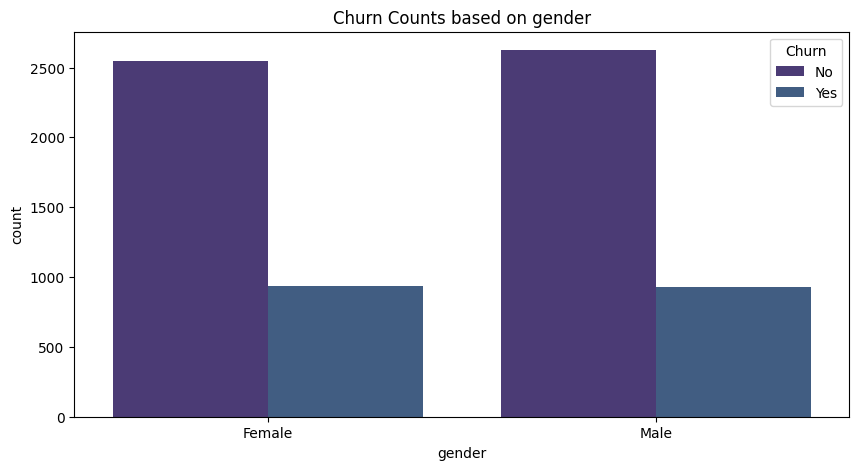

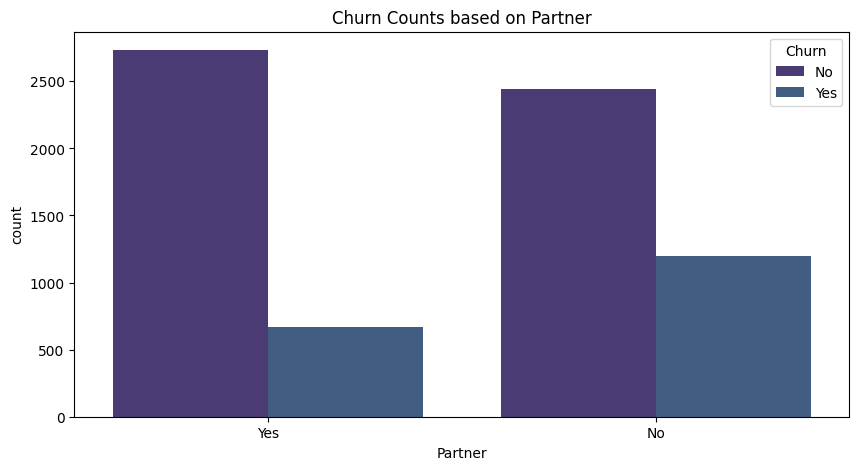

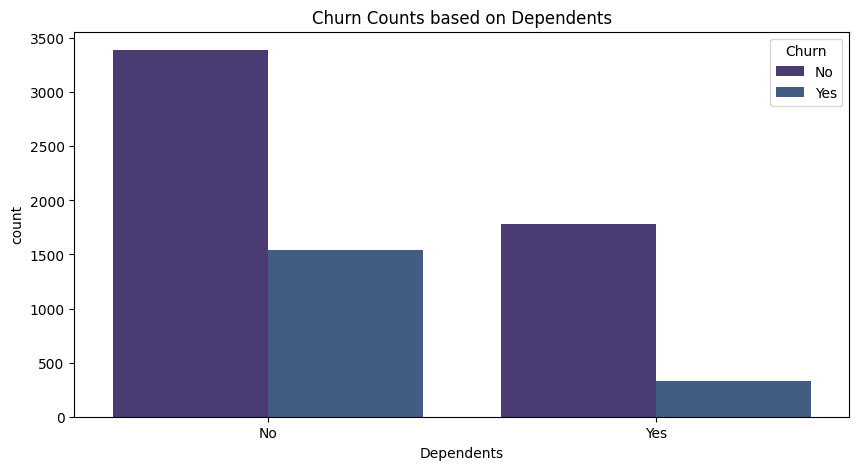

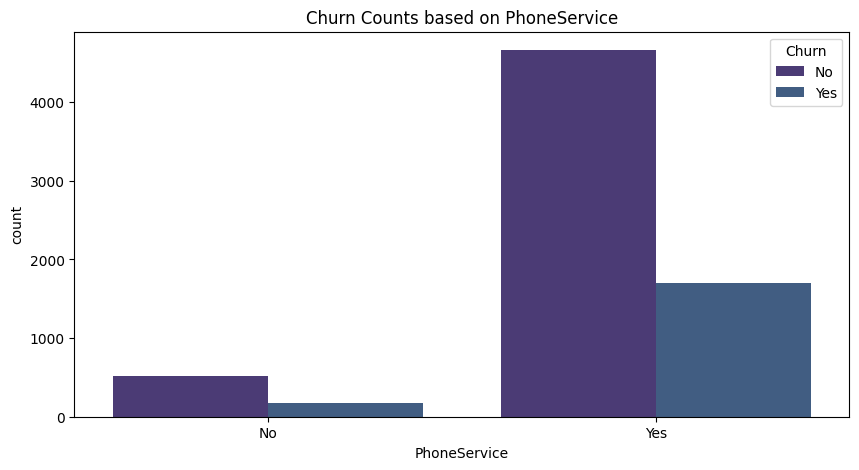

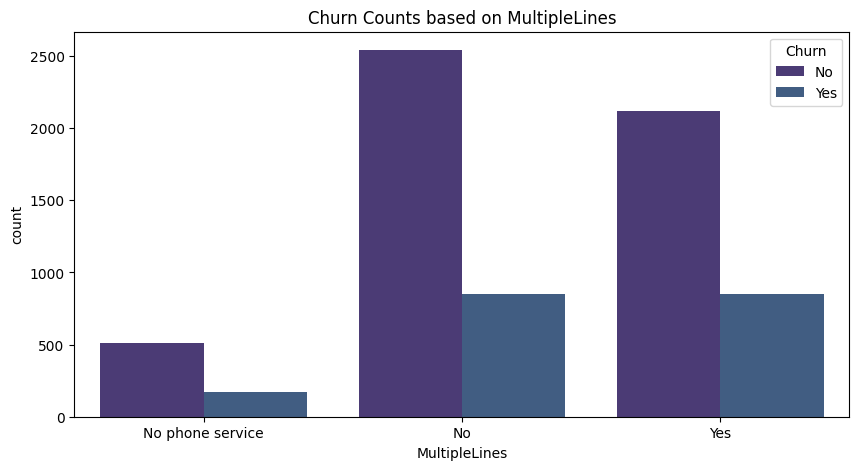

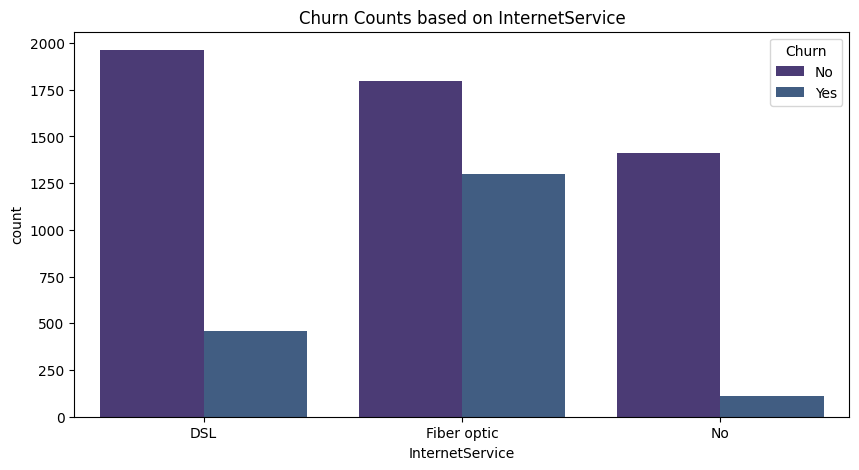

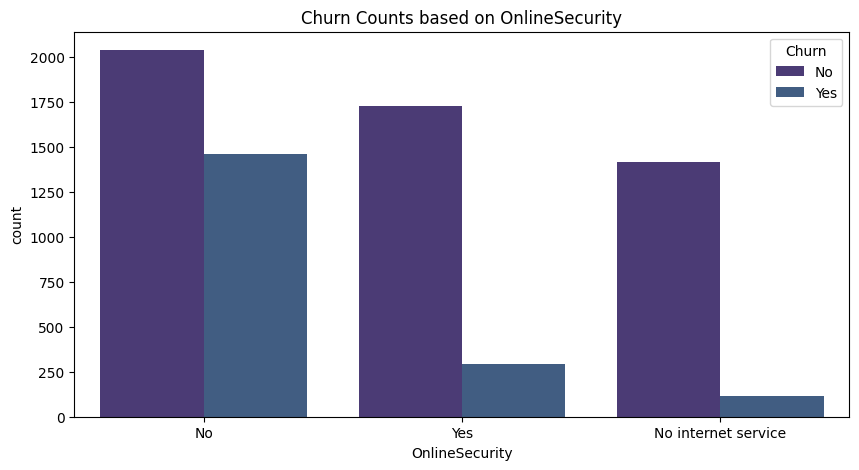

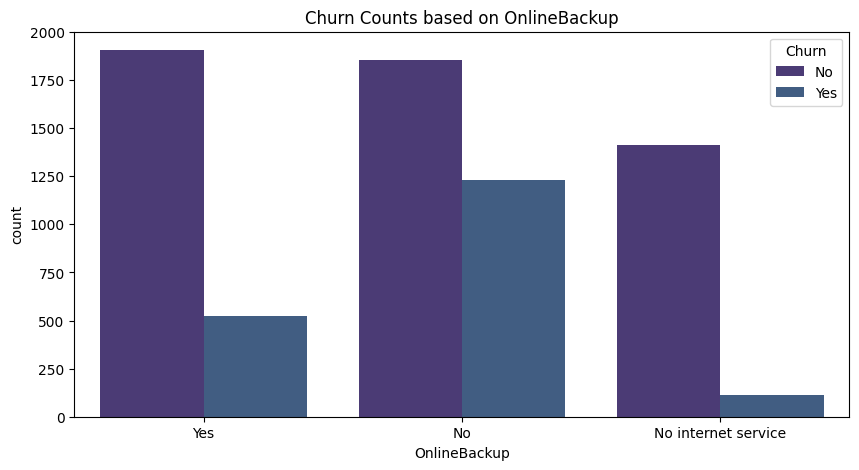

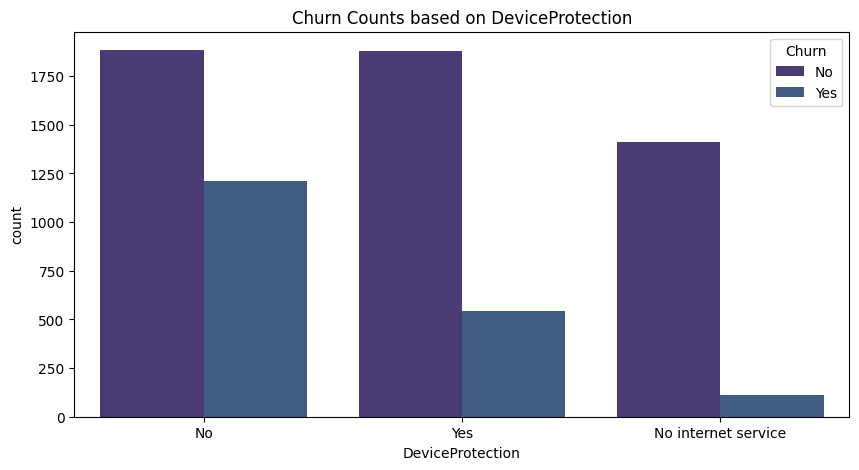

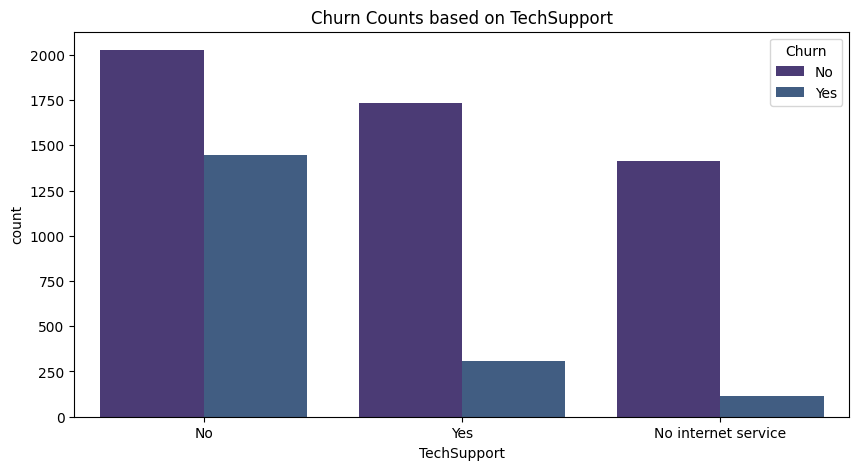

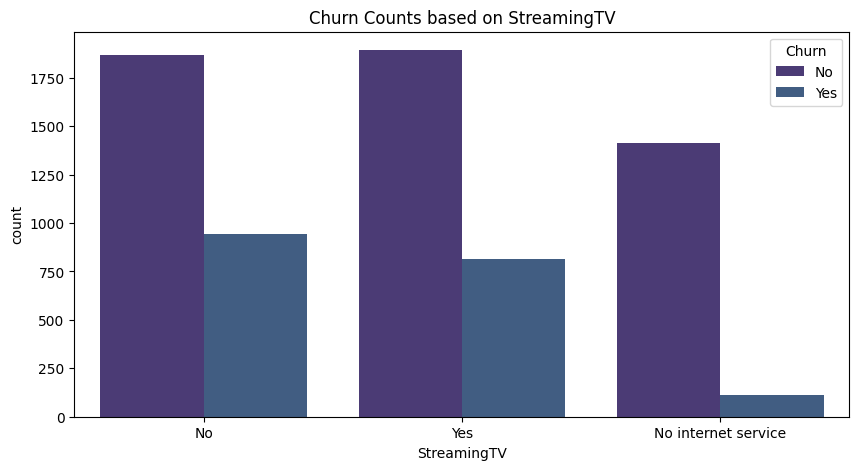

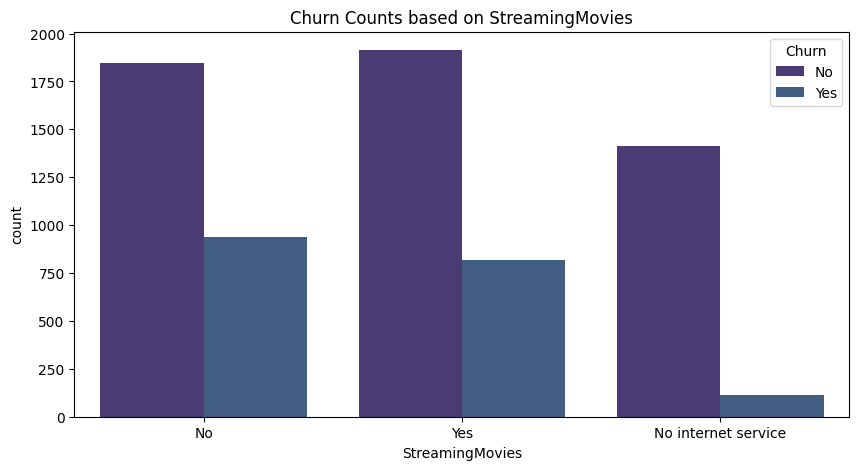

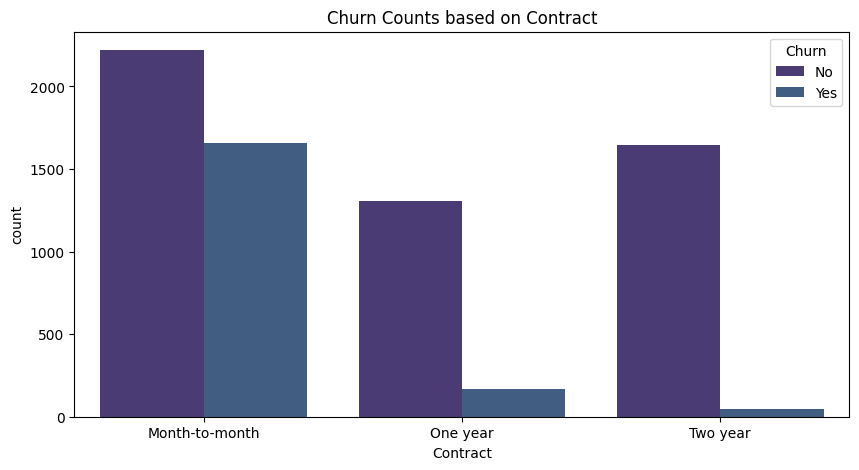

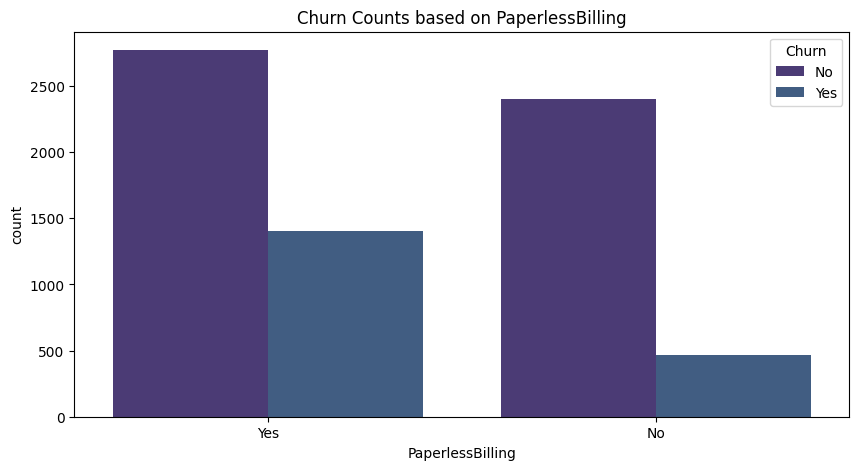

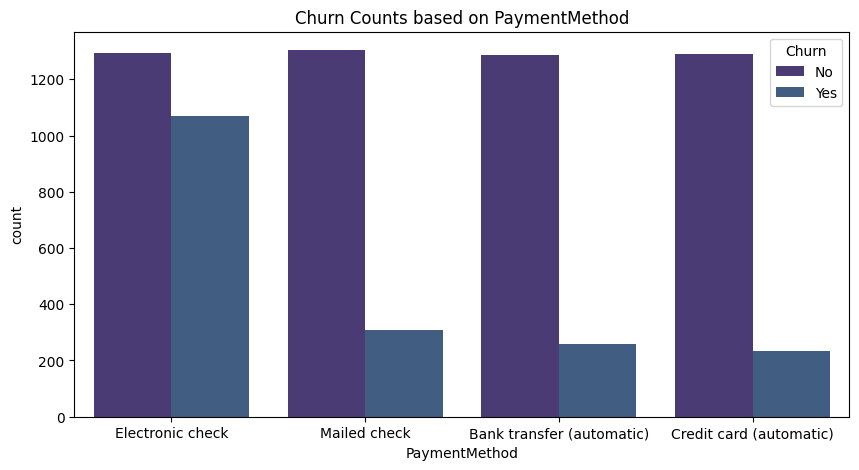

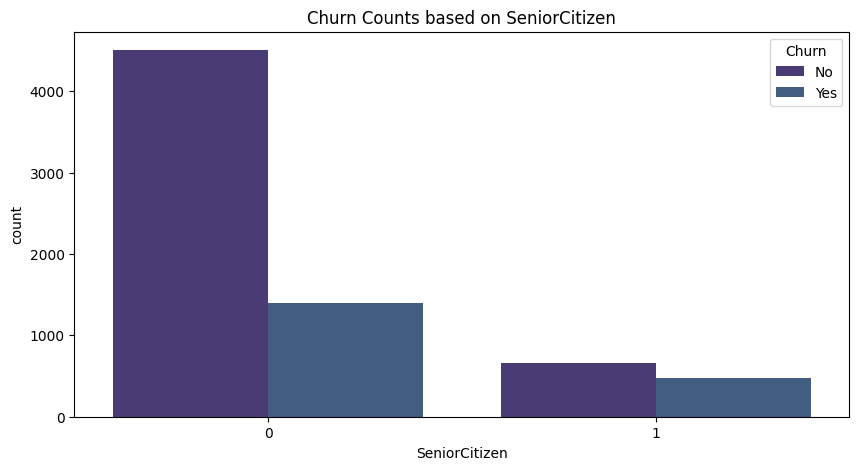

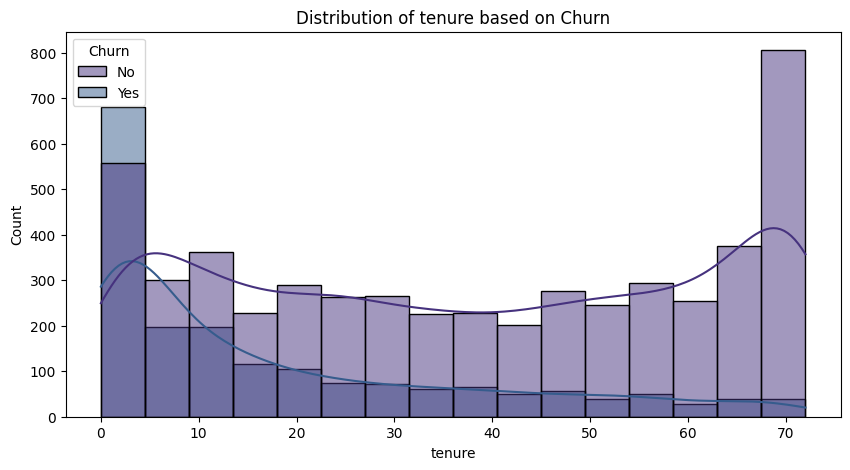

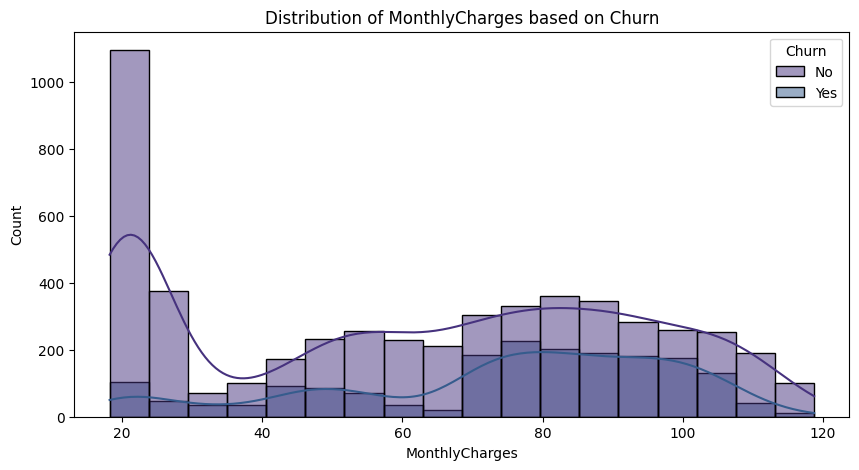

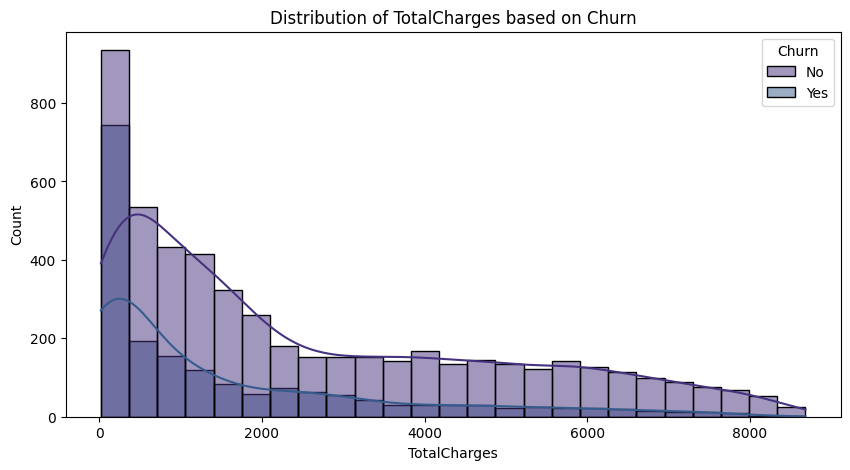

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

# Pengaturan untuk visualisasi
sns.set_palette('viridis')

# Fitur kategorikal untuk visualisasi
categorical_features = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                         'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                         'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'SeniorCitizen']

# Fitur numerik untuk visualisasi
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Visualisasi untuk fitur kategorikal
for feature in categorical_features:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=feature, hue='Churn', data=df)
    plt.title(f'Churn Counts based on {feature}')
    plt.show()

# Visualisasi untuk fitur numerik
for feature in numerical_features:
    plt.figure(figsize=(10, 5))
    sns.histplot(data=df, x=feature, hue='Churn', kde=True)
    plt.title(f'Distribution of {feature} based on Churn')
    plt.show()


In [91]:
# Insight: Jenis kelamin tidak tampak menjadi faktor yang signifikan dalam keputusan pelanggan untuk berhenti langganan.

# Insight: Sebagian besar pelanggan yang berhenti langganan bukan merupakan warga lanjut usia.

# Insight: Sebagian besar pelanggan yang meninggalkan perusahaan tidak memiliki tanggungan.

# Insight: Tampaknya sebagian besar pelanggan yang berhenti langganan tidak memiliki pasangan.

# Insight: Kontrak bulan ke bulan cenderung memiliki jumlah pelanggan yang berhenti langganan paling tinggi,
  #sedangkan kontrak 2 tahun memiliki jumlah pelanggan yang berhenti langganan paling sedikit, diikuti oleh kontrak 1 tahun.

# Insight: Sebagian besar pelanggan yang meninggalkan perusahaan memilih tagihan tanpa kertas (paperless billing).

# Insight: Sebagian besar pelanggan yang berhenti langganan memilih pembayaran menggunakan cek elektronik.
  #Terdapat perbedaan yang signifikan antara metode pembayaran ini dengan metode otomatis (transfer bank, kartu kredit) serta cek pos.

# Insight: Antara 0 hingga 8 bulan, kemungkinan seorang pelanggan berhenti langganan cukup tinggi.
  #Namun, semakin lama pelanggan tinggal di perusahaan, semakin kecil kemungkinan dia akan berhenti langganan.

# Insight: Semakin rendah jumlah biaya per bulan, semakin kecil kemungkinan pelanggan akan berhenti langganan. 
  #Terutama untuk rentang biaya 18-28 dolar/bulan, retensi pelanggan sangat tinggi. 
  #Namun, seiring dengan meningkatnya biaya bulanan, probabilitas pelanggan berhenti langganan juga meningkat.

# Insight: Tampaknya sebagian besar pelanggan yang meninggalkan perusahaan menggunakan layanan internet berbasis serat optik (fiber optic),
  #sedangkan sebagian besar pelanggan yang tetap menggunakan layanan DSL.

# Insight: Sebagian besar pelanggan yang berhenti langganan tidak memiliki keamanan online.

# Insight: Sebagian besar pelanggan yang tetap sudah memiliki layanan telepon dengan perusahaan.

# Insight: Layanan multiple lines tidak tampak menjadi faktor yang signifikan dalam keputusan pelanggan untuk berhenti langganan.

# Insight: Sebagian besar pelanggan yang meninggalkan perusahaan tidak memiliki layanan cadangan online.

# Insight: Sebagian besar pelanggan yang berhenti langganan tidak memiliki layanan perlindungan perangkat.

# Insight: Sebagian besar pelanggan yang meninggalkan perusahaan tidak memiliki layanan dukungan teknis.

# Insight: Layanan streaming TV tidak tampak menjadi faktor yang signifikan dalam keputusan pelanggan untuk berhenti langganan.

# Insight: Layanan streaming film tidak tampak menjadi faktor yang signifikan dalam keputusan pelanggan untuk berhenti langganan.

# Insight: Sebagian besar pelanggan yang meninggalkan perusahaan memiliki layanan telepon.


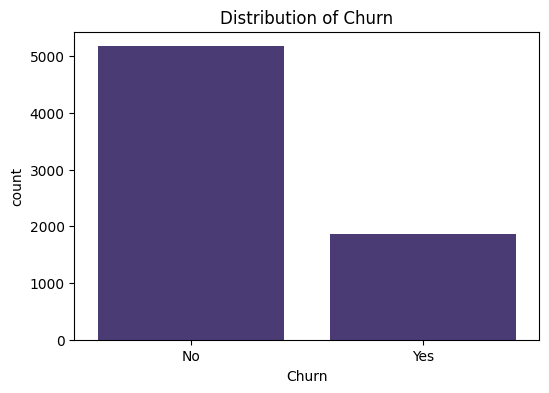

In [76]:
# Visualisasi untuk label 'Churn'
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=df)
plt.title('Distribution of Churn')
plt.show()

In [77]:
# Hitung proporsi kategori pada label
proporsi_churn = df['Churn'].value_counts(normalize=True) * 100

print(f"Proporsi kategori pada label (Churn):\n{proporsi_churn}")


Proporsi kategori pada label (Churn):
Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64


In [78]:
# Dapat disimpulkan bahwa proporsi kategori pada label "Churn" adalah imbalance. 
# Kategori "No" memiliki proporsi yang jauh lebih besar daripada kategori "Yes".


DATA PREPROCESSING

In [79]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [80]:
from sklearn.preprocessing import LabelEncoder

# Membuat objek LabelEncoder
label_encoder = LabelEncoder()

# Mengkonversi kolom non-numerik menjadi numerik
df['gender'] = label_encoder.fit_transform(df['gender'])
df['PaymentMethod'] = label_encoder.fit_transform(df['PaymentMethod'])
df['PaperlessBilling'] = label_encoder.fit_transform(df['PaperlessBilling'])
df['Contract'] = label_encoder.fit_transform(df['Contract'])
df['StreamingMovies'] = label_encoder.fit_transform(df['StreamingMovies'])
df['StreamingTV'] = label_encoder.fit_transform(df['StreamingTV'])
df['TechSupport'] = label_encoder.fit_transform(df['TechSupport'])
df['DeviceProtection'] = label_encoder.fit_transform(df['DeviceProtection'])
df['OnlineBackup'] = label_encoder.fit_transform(df['OnlineBackup'])
df['OnlineSecurity'] = label_encoder.fit_transform(df['OnlineSecurity'])
df['MultipleLines'] = label_encoder.fit_transform(df['MultipleLines'])
df['Churn'] = label_encoder.fit_transform(df['Churn'])
df['InternetService'] = label_encoder.fit_transform(df['InternetService'])
df['PhoneService'] = label_encoder.fit_transform(df['PhoneService'])
df['Dependents'] = label_encoder.fit_transform(df['Dependents'])
df['Partner'] = label_encoder.fit_transform(df['Partner'])
df['MonthlyCharges'] = label_encoder.fit_transform(df['MonthlyCharges'])
df['TotalCharges'] = label_encoder.fit_transform(df['TotalCharges'])

In [81]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,142,74,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,498,3624,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,436,536,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,266,3570,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,729,674,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,991,3700,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,1340,6305,0
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,137,1265,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,795,1157,1


In [82]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Pisahkan fitur dan label
X = df.drop('Churn', axis=1)
y = df['Churn']

# Normalisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Bagi data menjadi data train dan test (80:20)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

DATA MODELING

In [87]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [88]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import classification_report

# Inisialisasi model
logistic_regression = LogisticRegression(random_state=42)

# Melakukan K-Fold Cross Validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
cross_val_results_lr = cross_val_score(logistic_regression, X_train, y_train, cv=kfold, scoring='accuracy')

# Menampilkan hasil K-Fold Cross Validation
print(f"Logistic Regression Cross Validation Accuracy: {cross_val_results_lr.mean():.2f} (+/- {cross_val_results_lr.std():.2f})")
print()

# Melatih model
logistic_regression.fit(X_train, y_train)

# Melakukan prediksi pada data test
y_pred_lr = logistic_regression.predict(X_test)

# Menampilkan classification report
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr))
print("Confusion Matrix (Test):")
print(confusion_matrix(y_test, y_pred_lr))
print()


Logistic Regression Cross Validation Accuracy: 0.80 (+/- 0.01)

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1036
           1       0.68      0.56      0.61       373

    accuracy                           0.81      1409
   macro avg       0.77      0.73      0.74      1409
weighted avg       0.81      0.81      0.81      1409

Confusion Matrix (Test):
[[938  98]
 [165 208]]



In [89]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import classification_report

# Inisialisasi model
decision_tree = DecisionTreeClassifier(random_state=42)

# Melakukan K-Fold Cross Validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
cross_val_results_dt = cross_val_score(decision_tree, X_train, y_train, cv=kfold, scoring='accuracy')

# Menampilkan hasil K-Fold Cross Validation
print(f"Decision Tree Cross Validation Accuracy: {cross_val_results_dt.mean():.2f} (+/- {cross_val_results_dt.std():.2f})")
print()

# Melatih model
decision_tree.fit(X_train, y_train)

# Melakukan prediksi pada data test
y_pred_dt = decision_tree.predict(X_test)

# Menampilkan classification report
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))
print("Confusion Matrix (Test):")
print(confusion_matrix(y_test, y_pred_dt))
print()


Decision Tree Cross Validation Accuracy: 0.73 (+/- 0.01)

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.81      0.81      1036
           1       0.48      0.51      0.49       373

    accuracy                           0.73      1409
   macro avg       0.65      0.66      0.65      1409
weighted avg       0.73      0.73      0.73      1409

Confusion Matrix (Test):
[[834 202]
 [184 189]]



In [90]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import classification_report

# Inisialisasi model
random_forest = RandomForestClassifier(random_state=42)

# Melakukan K-Fold Cross Validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
cross_val_results_rf = cross_val_score(random_forest, X_train, y_train, cv=kfold, scoring='accuracy')

# Menampilkan hasil K-Fold Cross Validation
print(f"Random Forest Cross Validation Accuracy: {cross_val_results_rf.mean():.2f} (+/- {cross_val_results_rf.std():.2f})")
print()

# Melatih model
random_forest.fit(X_train, y_train)

# Melakukan prediksi pada data test
y_pred_rf = random_forest.predict(X_test)

# Menampilkan classification report
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix (Test):")
print(confusion_matrix(y_test, y_pred_rf))
print()


Random Forest Cross Validation Accuracy: 0.79 (+/- 0.01)

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.66      0.47      0.55       373

    accuracy                           0.79      1409
   macro avg       0.74      0.69      0.71      1409
weighted avg       0.78      0.79      0.78      1409

Confusion Matrix (Test):
[[945  91]
 [198 175]]



Hasil setiap fold dari K-Fold Cross Validation memperlihatkan konsistensi yang baik. Anda dapat melihat bahwa nilai akurasi dari setiap fold tidak memiliki perbedaan yang signifikan (selisih kurang dari 0.01), yang menunjukkan konsistensi dalam performa model pada setiap iterasi.

Perbandingan Model:

Setelah mengevaluasi ketiga model yang telah dilatih, yaitu Decision Tree, Random Forest, dan Logistic Regression, dapat ditarik beberapa kesimpulan berdasarkan hasil output yang dihasilkan.

1. **Decision Tree:**
   - Akurasi K-fold: 0.72 (+/- 0.01)
   - Precision (kelas 1): 0.49
   - Recall (kelas 1): 0.46

2. **Random Forest:**
   - Akurasi K-fold: 0.79 (+/- 0.01)
   - Precision (kelas 1): 0.66
   - Recall (kelas 1): 0.49

3. **Logistic Regression:**
   - Akurasi K-fold: 0.80 (+/- 0.01)
   - Precision (kelas 1): 0.68
   - Recall (kelas 1): 0.57

Berdasarkan hasil evaluasi tersebut, Logistic Regression memiliki akurasi yang kompetitif dengan Random Forest, tetapi menunjukkan nilai Precision dan Recall yang lebih baik untuk kelas 1 (churn). Hal ini menandakan bahwa Logistic Regression lebih efektif dalam mengidentifikasi pelanggan yang berpotensi untuk churn.

Meskipun Decision Tree memiliki akurasi yang layak, nilai Precision dan Recall untuk kelas 1 lebih rendah dibandingkan dengan dua model lainnya.

Kaitan dengan Studi Kasus Churn:

Dalam konteks studi kasus mengenai churn, pilihan Logistic Regression sebagai model terbaik dapat dijustifikasi dengan kecenderungan model ini untuk memberikan keseimbangan yang baik antara mengidentifikasi pelanggan yang berpotensi churn (Recall yang baik) dan menghindari false positives yang tidak perlu (Precision yang baik).

Lebih lanjut, Logistic Regression cocok digunakan jika perusahaan memiliki kebijakan atau strategi yang menekankan pentingnya mencegah kehilangan pelanggan. Dengan memaksimalkan Recall, perusahaan dapat lebih proaktif dalam memberikan tindakan retensi kepada pelanggan yang memang berisiko untuk churn.

Namun, keputusan akhir tetap bergantung pada preferensi dan tujuan bisnis spesifik perusahaan, dan dapat dilakukan evaluasi lebih lanjut sesuai dengan konteks dan kebutuhan proyek.

INTERPRETASI BISNIS


1. **Bagaimana hasil model dapat diinterpretasikan ke permasalahan nyata?**
   
   Hasil model dapat diinterpretasikan sebagai prediksi potensial terkait perilaku pelanggan terkait churn dalam lingkungan perusahaan telekomunikasi. Model Logistic Regression yang dipilih sebagai model terbaik menunjukkan kemampuannya untuk memberikan keseimbangan yang baik antara mengidentifikasi pelanggan yang berpotensi untuk churn dan meminimalkan kesalahan prediksi. Dalam konteks nyata, interpretasi dapat dilakukan sebagai berikut: jika model memberikan prediksi churn yang tinggi untuk suatu pelanggan, perusahaan dapat mengambil tindakan retensi yang sesuai untuk mencegah kehilangan pelanggan tersebut.

2. **Faktor apa saja yang mempengaruhi customer churn?**
   
   Berdasarkan hasil model dan analisis fitur-fitur yang signifikan, faktor-faktor yang mempengaruhi customer churn antara lain:
   - Jangka waktu kontrak (Contract): Pelanggan dengan kontrak bulan-ke-bulan cenderung memiliki tingkat churn yang lebih tinggi dibandingkan dengan pelanggan dengan kontrak jangka panjang.
   - Metode pembayaran (PaymentMethod): Pelanggan yang menggunakan pembayaran cek elektronik memiliki kecenderungan churn yang berbeda dengan pelanggan menggunakan metode pembayaran lainnya.
   - Tagihan tanpa kertas (PaperlessBilling): Pelanggan yang memilih tagihan tanpa kertas memiliki tingkat churn yang signifikan.
   - Lama berlangganan (Tenure): Lama berlangganan memberikan dampak signifikan terhadap kecenderungan churn. Semakin lama pelanggan berlangganan, semakin kecil kemungkinan mereka untuk churn.

3. **Apa suggestion yang bisa diberikan kepada perusahaan telco, berdasarkan model yang dihasilkan?**
   
   - Menawarkan insentif atau promosi untuk pelanggan dengan kontrak bulan-ke-bulan agar beralih ke kontrak jangka panjang.
   - Mengkaji metode pembayaran dan menyesuaikannya dengan preferensi pelanggan untuk meningkatkan retensi.
   - Memperkenalkan program retensi khusus untuk pelanggan dengan tagihan tanpa kertas.
   - Memberikan penawaran khusus atau layanan tambahan kepada pelanggan yang telah berlangganan untuk periode waktu yang lebih lama.

Dengan menerapkan saran-saran di atas, perusahaan dapat meningkatkan strategi retensinya dan mengurangi jumlah pelanggan yang melakukan churn. Interpretasi bisnis ini memberikan wawasan berharga untuk pengambilan keputusan yang lebih baik dan penerapan strategi yang lebih efektif dalam mengelola churn pelanggan.